# GDS Library Algo overview


1. Centrality - used to find importance of certain nodes
2. Community Detection/Clustering - evaluates how a group is clustered or partitioned
3. Node Embeddings - vector representation of nodes, used as ML input
4. Pathfinding - finding optimum (shortest, cheapest, available) routes
5. Similarity - calculate similiarity of nodes
6. Link Prediction - algos determine closeness of pairs of nodes


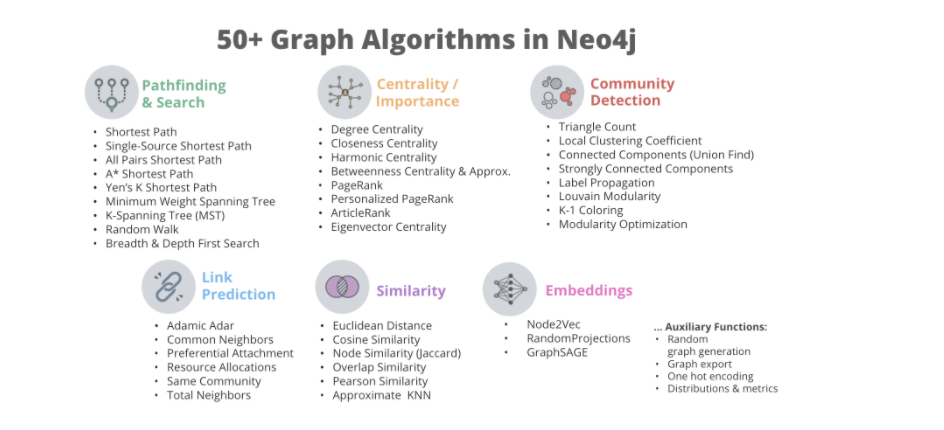



## How do graph Algos work?


* Graph projection (think of it as a database view) is created. Basically contains only relevant potentially aggregated, topological and property info. 
* Graph projections are stored entirely in-memory using compressed data structures optimized for topology and property lookups


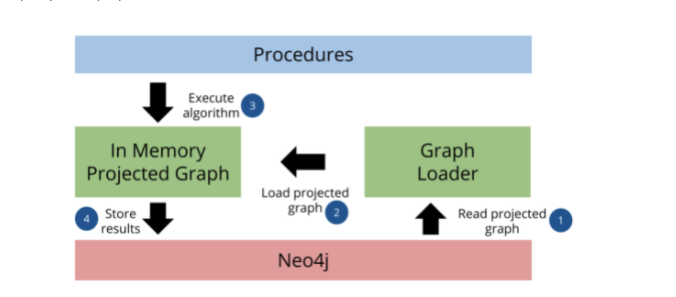


* Graph analytics pipeline constists of three main parts:

1. Graph loader reads the stored graph from Neo4j and loads it into an in-memory projected graph. 
2. Execute graph algo
3. Stream or store the results back to Neo4j






### Named Graph


* Graph catalog is a concept within the GDS library that allows managing multiple graph projections by name. 
* Called a 'Named Graph' because we can retrieve it by name when executing graph algos. 
* Advantage of using named graphs is that they can e used many times in analytical workflows. 
* you can use the results of one graph algo as the inputs to another.


### Native Projection

* Main benefit here is performance 




### Node Projection parameters

* String

```'Person'```

* Array
```['Person', 'Organization']```

* Map 
```
{
    <node-label>: {
        label: <neo4j-label>,
        properties: {
            <property-key-1>: {
                property: <neo-property-key>,
                defaultValue: <numeric-value>
            },
            <property-key-2>: {
                property: <neo-property-key>,
                defaultValue: <numeric-value>
            }
        }
    }
}
```



### Relationship projections


* String 

```
'FRIEND'
```


* Array
```
['FRIEND', 'COWORKER']
```


* Map

```
{
    <relationship-type>: {
        type: <neo4j-type>,
        orientation: <orientation>,
        aggregation: <aggregation-type>,
        properties: <relationship-property-mappings>
    }
}

```

* Map is used more frequently with relationship projections than w/ node projections
* allows us to specify orientation: NATURAL, REVERSE, UNDIRECTED
* allows us to use aggregations, which can be used to reduce a multigraph into a single graph




## Cypher Projections



* You can also use cypher for the node and relationship projections, if you need to get even more grainular


```


CALL gds.graph.create.cypher(
    'troll-graph',
    'MATCH (n:Troll) RETURN id(n) AS id',
    'MATCH (r1:Troll)-[:POSTED]->(:Tweet)<-[:RETWEETED]-(:Tweet)<-[:POSTED]-(r2:Troll)
     RETURN id(r2) as source, id(r1) as target, count(*) as weight, "AMPLIFIED" as type'
)

```

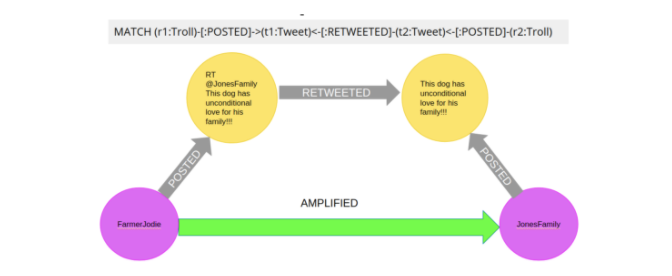

### After you have finished graph analysis you can release the named graph


```

CALL gds.graph.drop(<graph-name>)


```

## Anonymous graph projections

* Good for quickly virtualizing a graph, for one off scenarios
* Can use cypher projections as well



```

CALL gds.pageRank.stream(
  {
    nodeProjection: 'Person',
    relationshipProjection: ['FRIEND', 'COWORKER'],
    relationshipProperties: 'weight',
    relationshipWeightProperty:'weight'
  }
)


CALL gds.pageRank.stream(
  {
    nodeQuery: 'MATCH (n:Author) RETURN id(n) AS id',
    relationshipQuery: 'MATCH (p1:Author)-[:WROTE]->(a:Article)<-[:WROTE]-(p2:Author)
                        RETURN id(p1) AS source, id(p2) AS target, count(a) AS weight',
    relationshipWeightProperty:'weight'
  }
)


```






